# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

3 Observations:
1. There is a strong correlation between latitude and max temperatures. The further you are from the equator, the higher the max temperature tends to be. 
2. There is no correlation between cloudiness and latitude.
3. There is no correlation between wind speeds and latitude. However, most locations have wind speeds under 15mph on a regular basis.


In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
import json
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


634

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#save config info
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

# Build query URL
query_url = url + "appid=" + weather_api_key + "&q="

#get weather data and convert reponse to json
weather_response = requests.get(query_url + city)
weather_json = weather_response.json()

pprint(weather_json)



{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 78.22, 'lon': 15.64},
 'dt': 1594671505,
 'id': 2729907,
 'main': {'feels_like': 42.89,
          'humidity': 76,
          'pressure': 1020,
          'temp': 48.2,
          'temp_max': 48.2,
          'temp_min': 48.2},
 'name': 'Longyearbyen',
 'sys': {'country': 'SJ', 'id': 1663, 'sunrise': 0, 'sunset': 0, 'type': 1},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 230, 'speed': 5.82}}


In [6]:
weather_response

<Response [200]>

In [7]:
# Perform a weather check on each city using a series of successive API calls.
# Include a print log of each city as it'sbeing processed (with the city number and city name).   


#set up list to hold response info
city_weather = []

counter = 0

#loop through the list of cities and perform a request for weather data for each city
for city in cities:
    
    #gets response for each city
    response = requests.get(query_url + city).json()  
    
    #try/except statement to handle errors when city is not found on openweather site
    try:
        
        #create dictionary
        weather_dict = {
            "City": response['name'],
            "Lat": response['coord']['lat'],
            "Lng": response['coord']['lon'],
            "Max Temp": response['main']['temp_max'],
            "Humidity": response['main']['humidity'],
            "Cloudiness": response['clouds']['all'],
            "Wind Speed": response['wind']['speed'],
            "Country": response['sys']['country'],
            "Date": response['dt']
        }
        city_weather.append(weather_dict)
        
        counter = counter + 1
        
        print(f"{counter} City Name: {response['name']} / ID:{response['id']}")
        
        #pprint(response)

    except:
        
        print("Missing city...skipping | " + city)

#city_weather


1 City Name: Bredasdorp / ID:1015776
2 City Name: Mataura / ID:6201424
3 City Name: Kangaatsiaq / ID:3422683
Missing city...skipping | cam pha
4 City Name: Albany / ID:5106841
5 City Name: Mahébourg / ID:934322
6 City Name: Hermanus / ID:3366880
7 City Name: Chui / ID:3443061
8 City Name: Harda / ID:1270375
9 City Name: Cape Town / ID:3369157
10 City Name: Berkakit / ID:2026777
11 City Name: Wonosobo / ID:1621395
12 City Name: Usakos / ID:3352461
13 City Name: Port-de-Bouc / ID:6447156
14 City Name: Saint-Philippe / ID:935215
15 City Name: Lüderitz / ID:3355672
16 City Name: Kiama / ID:2161515
17 City Name: Atuona / ID:4020109
18 City Name: Hobart / ID:2163355
19 City Name: Lakselv / ID:779082
20 City Name: Florø / ID:3156980
21 City Name: Paamiut / ID:3421193
22 City Name: Butaritari / ID:2110227
23 City Name: Rikitea / ID:4030556
24 City Name: Beira / ID:1052373
Missing city...skipping | attawapiskat
25 City Name: Yellowknife / ID:6185377
26 City Name: Bandarbeyla / ID:64814
Missing 

209 City Name: Airai / ID:1651810
210 City Name: Luoyang / ID:1801792
211 City Name: Saurimo / ID:145531
212 City Name: Port-Gentil / ID:2396518
213 City Name: Wuda / ID:1791325
214 City Name: Lavrentiya / ID:4031637
215 City Name: Thompson / ID:6165406
216 City Name: Caçapava do Sul / ID:3468560
217 City Name: Aksarka / ID:1512019
Missing city...skipping | sinkat
218 City Name: Umba / ID:479071
219 City Name: Brownfield / ID:5517675
220 City Name: Nyaunglebin / ID:1303406
221 City Name: Aracaju / ID:3471872
Missing city...skipping | bur gabo
222 City Name: Sijunjung / ID:1627185
223 City Name: Comodoro Rivadavia / ID:3860443
224 City Name: Torbay / ID:6167817
225 City Name: Malakal / ID:370737
Missing city...skipping | longlac
226 City Name: São Filipe / ID:3374210
227 City Name: Forsytheganj / ID:10722858
228 City Name: Terrace / ID:6162949
229 City Name: Umm Kaddadah / ID:364933
Missing city...skipping | nizhneyansk
230 City Name: Concepción / ID:3893894
231 City Name: Faanui / ID:4

412 City Name: Kousséri / ID:2229798
413 City Name: Isangel / ID:2136825
414 City Name: Gloversville / ID:5118743
415 City Name: Cerqueira César / ID:3466430
416 City Name: Belaya Gora / ID:2126785
417 City Name: Buctzotz / ID:3532089
418 City Name: Salvatierra / ID:3988050
419 City Name: Tumut / ID:2145875
420 City Name: Rodrigues Alves / ID:3665210
Missing city...skipping | aflu
421 City Name: Udachny / ID:2014624
422 City Name: Nabire / ID:1634614
423 City Name: Yaan / ID:2338660
424 City Name: Gråsten / ID:2621258
425 City Name: Port Elizabeth / ID:964420
426 City Name: Puerto Carreño / ID:3671519
427 City Name: Maşyāf / ID:167046
428 City Name: Izberbash / ID:554894
Missing city...skipping | saleaula
429 City Name: Mareeba / ID:2158767
Missing city...skipping | vaitupu
430 City Name: Ukiah / ID:5404476
431 City Name: Arroyo de la Encomienda / ID:3129371
432 City Name: Skellefteå / ID:602913
433 City Name: Kenai / ID:5866063
434 City Name: Ziyang / ID:1790863
435 City Name: Kolpash

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [181]:
weather_df = pd.DataFrame(city_weather)
weather_df

weather_df['Date'] = pd.to_datetime(weather_df['Date'], unit ='s')

weather_df

#export df to csv
#weather_df.to_csv(r'Weather_DF.csv')


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.53,20.04,48.20,81,100,17.22,ZA,2020-07-13 20:16:40
1,Mataura,-46.19,168.86,39.00,83,100,3.00,NZ,2020-07-13 20:19:26
2,Kangaatsiaq,68.31,-53.46,41.76,92,96,16.28,GL,2020-07-13 20:20:52
3,Albany,42.60,-73.97,89.01,37,4,1.01,US,2020-07-13 20:18:12
4,Mahébourg,-20.41,57.70,69.80,88,40,11.41,MU,2020-07-13 20:20:06
...,...,...,...,...,...,...,...,...,...
584,Udon Thani,17.42,102.79,77.61,85,100,4.05,TH,2020-07-13 20:22:13
585,Preeceville,51.95,-102.67,66.02,75,59,13.24,CA,2020-07-13 20:22:14
586,Areosa,41.72,-8.86,80.01,54,0,4.70,PT,2020-07-13 20:22:14
587,Tautira,-17.73,-149.15,78.80,78,75,6.93,PF,2020-07-13 20:22:14


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#  Get the indices of cities that have humidity over 100%.
humidity = weather_df.loc[(weather_df['Humidity']>100)]
len(humidity)


0

In [118]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#SKIPPING 

clean_weather_df = weather_df.loc[weather_df['Humidity'] <= 100]
clean_weather_df



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.53,20.04,48.20,81,100,17.22,ZA,2020-07-13 20:16:40
1,Mataura,-46.19,168.86,39.00,83,100,3.00,NZ,2020-07-13 20:19:26
2,Kangaatsiaq,68.31,-53.46,41.76,92,96,16.28,GL,2020-07-13 20:20:52
3,Albany,42.60,-73.97,89.01,37,4,1.01,US,2020-07-13 20:18:12
4,Mahébourg,-20.41,57.70,69.80,88,40,11.41,MU,2020-07-13 20:20:06
...,...,...,...,...,...,...,...,...,...
584,Udon Thani,17.42,102.79,77.61,85,100,4.05,TH,2020-07-13 20:22:13
585,Preeceville,51.95,-102.67,66.02,75,59,13.24,CA,2020-07-13 20:22:14
586,Areosa,41.72,-8.86,80.01,54,0,4.70,PT,2020-07-13 20:22:14
587,Tautira,-17.73,-149.15,78.80,78,75,6.93,PF,2020-07-13 20:22:14


In [91]:
# Extract relevant fields from the data frame
# Export the City_Data into a csv

#clean_weather_df.to_csv(r'Weather_DF.csv')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [169]:
#inlcuding date variable for title
date_stamp = weather_df.iloc[0,8]

#date_stamp = weather_df['Date'].values[0]
#date_stamp.time.strftime('%Y-%m-%d', time.localtime())
#date_stamp




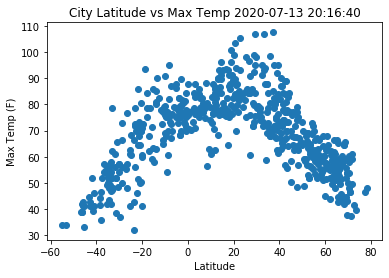

In [125]:
x_axis = weather_df['Lat']
y_axis = weather_df['Max Temp']

plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title(f'City Latitude vs Max Temp {date_stamp}')
plt.scatter(x_axis, y_axis)

#print scatter plot to png file - commented out afterwards
#plt.savefig("Latitude vs Temperature.png")   

plt.show()


In [126]:
#analysis: Temperature varies by latitude. Tempearture is typically warmest near the equator and decreases the further away from the equater you are. 

## Latitude vs. Humidity Plot

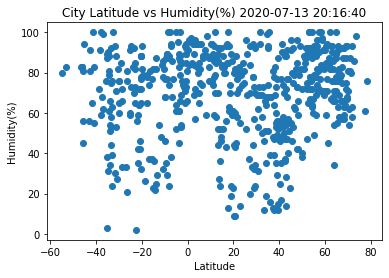

In [151]:
x_axis2 = clean_weather_df['Lat']
y_axis2 = clean_weather_df['Humidity']

plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title(f'City Latitude vs Humidity(%) {date_stamp}')
plt.scatter(x_axis2, y_axis2)


#print scatter plot to png file - commented out afterwards
#plt.savefig("Latitude vs Humidity.png")

plt.show()

In [128]:
#analysis: higher humidity is more common around the world. there is no correlation between latitude and humidity.

## Latitude vs. Cloudiness Plot

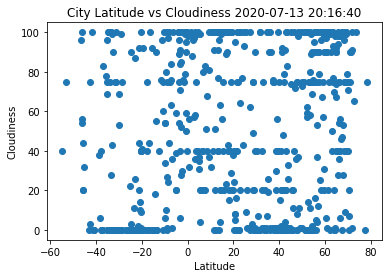

In [153]:
x_axis3 = clean_weather_df['Lat']
y_axis3 = clean_weather_df['Cloudiness']

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f'City Latitude vs Cloudiness {date_stamp}')
plt.scatter(x_axis3, y_axis3)

#print scatter plot to png file - commented out afterwards
#plt.savefig("Latitude vs Cloudiness.png")

plt.show()

In [130]:
#analysis: there is no correlation between cloudiness and latitude.

## Latitude vs. Wind Speed Plot

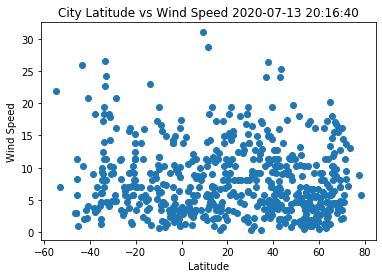

In [154]:
x_axis4 = clean_weather_df['Lat']
y_axis4 = clean_weather_df['Wind Speed']

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f'City Latitude vs Wind Speed {date_stamp}')
plt.scatter(x_axis4, y_axis4)

#print scatter plot to png file - commented out afterwards
#plt.savefig("Latitude vs Wind Speed.png")

plt.show()

In [132]:
#analysis: most wind speeds are under 15 mph. there is no correlation between latitude and wind speed.

## Linear Regression

In [133]:
# OPTIONAL: Create a function to create Linear Regression plots

def splot(xaxis, yaxis, title, xlabel, ylabel, annotation):
    #calculate linear regression and plot the line
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(xaxis, yaxis)
    regress_values = xaxis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(xaxis, yaxis)
    plt.plot(xaxis,regress_values,"r-")
    plt.annotate(line_eq,(annotation),fontsize=15,color="red")
    
    print(f"The r-squared is: {rvalue**2}")
    
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)           
    plt.title(title)  
    
    plt.show()


In [134]:
# Create Northern and Southern Hemisphere DataFrames
nhem_df = clean_weather_df.loc[(clean_weather_df['Lat']>0)]
shem_df = clean_weather_df.loc[(clean_weather_df['Lat']<0)]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5341402979311405


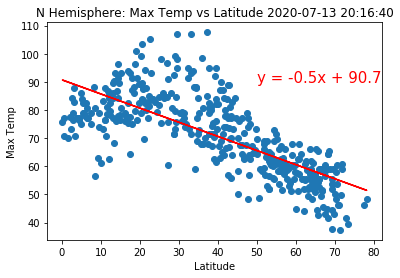

In [156]:
#create the charts based on the norther df or southern df

splot(nhem_df['Lat'],nhem_df['Max Temp'], title = (f'N Hemisphere: Max Temp vs Latitude {date_stamp}'), xlabel = "Latitude", ylabel = "Max Temp", annotation = (50,90))

#print scatter plot to png file - commented out afterwards
#plt.savefig("N Hemi - Max Temp vs Latitude Linear Regression.png")


In [136]:
#analysis: there is a strong correlation between latitude and max temp. We looked at temperatures on July 11,2020. It makes sense that temperatures decrease the further away you are from the equator.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6518200727499208


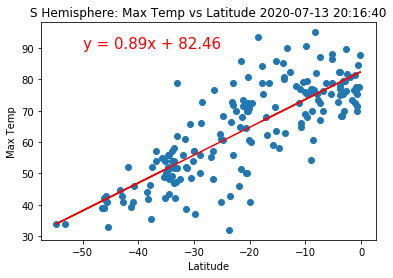

In [157]:
splot(shem_df['Lat'],shem_df['Max Temp'], title = (f'S Hemisphere: Max Temp vs Latitude {date_stamp}'), xlabel = "Latitude", ylabel = "Max Temp", annotation = (-50,90))

#print scatter plot to png file - commented out afterwards
#plt.savefig("S Hemi - Max Temp vs Latitude Linear Regression.png")

In [138]:
#analysis: there is a strong correlation between latitude and max temp. We looked at temperatures on July 11,2020.It makes sense that temperatures increase the closer you get to the equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.004434821452488149


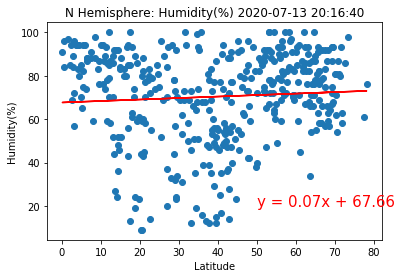

In [158]:
splot(nhem_df['Lat'],nhem_df['Humidity'], title = (f'N Hemisphere: Humidity(%) {date_stamp}'), xlabel = "Latitude", ylabel = "Humidity(%)", annotation = (50,20))

#print scatter plot to png file - commented out afterwards
#plt.savefig("N Hemi - Humidity vs Latitude Linear Regression.png")

In [140]:
#analysis: higher humidity is more common around the world. there is no correlation between latitude and humidity.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.00348766706192968


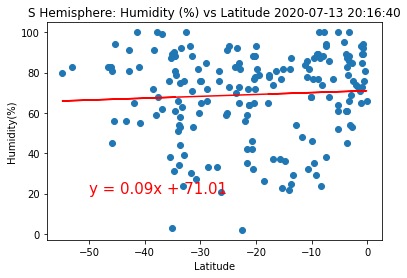

In [159]:
splot(shem_df['Lat'],shem_df['Humidity'], title = (f'S Hemisphere: Humidity (%) vs Latitude {date_stamp}'), xlabel = "Latitude", ylabel = "Humidity(%)", annotation = (-50,20))

#print scatter plot to png file - commented out afterwards
#plt.savefig("S Hemi - Humidity vs Latitude Linear Regression.png")

In [142]:
#analysis: higher humidity is more common around the world. there is no correlation between latitude and humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0025397742749449963


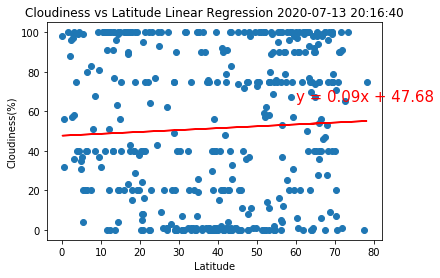

In [160]:
splot(nhem_df['Lat'],nhem_df['Cloudiness'], title = (f'Cloudiness vs Latitude Linear Regression {date_stamp}'), xlabel = "Latitude", ylabel = "Cloudiness(%)", annotation = (60,65))

#print scatter plot to png file - commented out afterwards
#plt.savefig("N Hemi - Cloudiness vs Latitude Linear Regression.png")

In [144]:
#analysis: there is no correlation between cloudiness and latitude.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06287348875800795


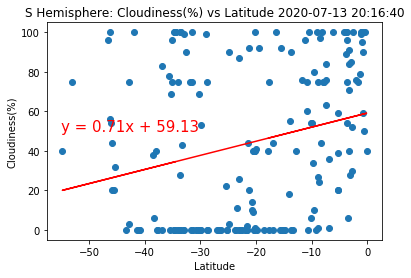

In [161]:
splot(shem_df['Lat'],shem_df['Cloudiness'], title = (f'S Hemisphere: Cloudiness(%) vs Latitude {date_stamp}'), xlabel = "Latitude", ylabel = "Cloudiness(%)", annotation = (-55,50))

#print scatter plot to png file - commented out afterwards
#plt.savefig("S Hemi - Cloudiness vs Latitude Linear Regression.png")

In [146]:
#analysis: there is no correlation between cloudiness and latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.004820364582316514


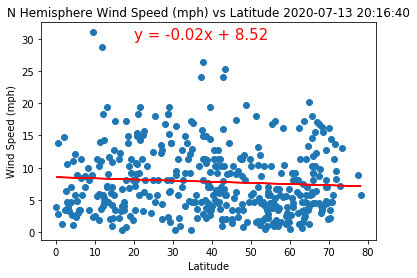

In [163]:
splot(nhem_df['Lat'],nhem_df['Wind Speed'], title = (f'N Hemisphere Wind Speed (mph) vs Latitude {date_stamp}'), xlabel = "Latitude", ylabel = "Wind Speed (mph)", annotation = (20,30))

#print scatter plot to png file - commented out afterwards
#plt.savefig("N Hemi - Wind Speed vs Latitude Linear Regression.png")

In [148]:
#analysis: most wind speeds are under 15 mph. there is no correlation between latitude and wind speed.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.029160431982854118


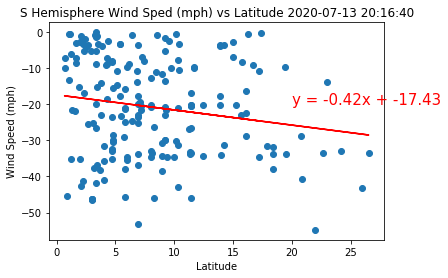

In [166]:
splot(shem_df['Wind Speed'],shem_df['Lat'], title = (f'S Hemisphere Wind Sped (mph) vs Latitude {date_stamp}'), xlabel = "Latitude", ylabel = "Wind Speed (mph)", annotation = (20,-20))

#print scatter plot to png file - commented out afterwards
#plt.savefig("S Hemi - Wind Speed vs Latitude Linear Regression.png")

In [150]:
#analysis: most wind speeds are under 15 mph. there is no correlation between latitude and wind speed.